<ipython-input-5-cb1d9452b7eb>:12: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption.txt', delimiter=';', parse_dates=True, infer_datetime_format=True)


Epoch 1/5
5197/5197 - 35s - loss: 0.2395 - val_loss: 0.1476 - 35s/epoch - 7ms/step
Epoch 2/5
5197/5197 - 32s - loss: 0.1592 - val_loss: 0.1423 - 32s/epoch - 6ms/step
Epoch 3/5
5197/5197 - 31s - loss: 0.1531 - val_loss: 0.1662 - 31s/epoch - 6ms/step
Epoch 4/5
5197/5197 - 33s - loss: 0.1484 - val_loss: 0.1457 - 33s/epoch - 6ms/step
Epoch 5/5
5197/5197 - 32s - loss: 0.1460 - val_loss: 0.1373 - 32s/epoch - 6ms/step
812/812 [==============================] - 3s 3ms/step


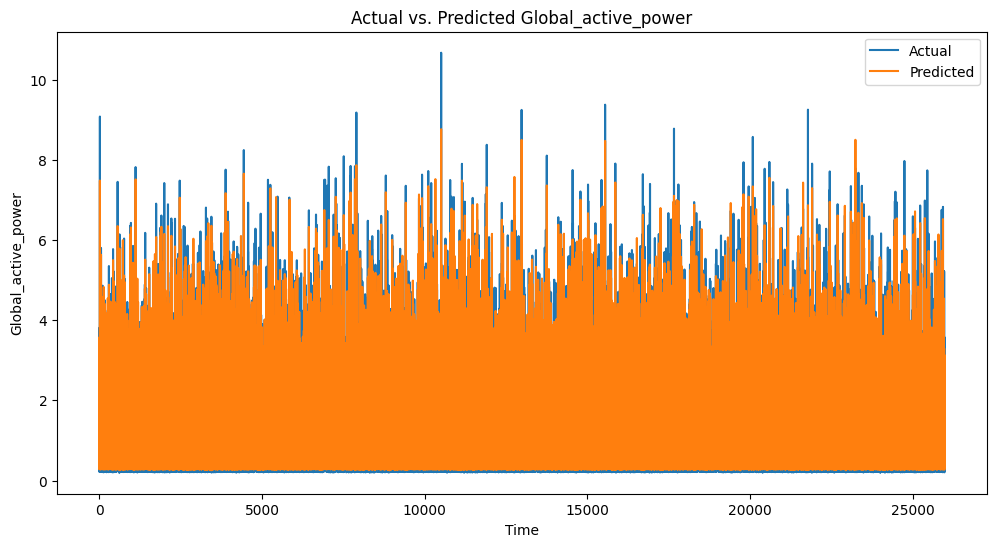

In [5]:
#exercise4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('/content/household_power_consumption.txt', delimiter=';', parse_dates=True, infer_datetime_format=True)

# Drop rows with missing values
df.dropna(inplace=True)

#print(df.columns)

# Combine data preprocessing steps
non_numeric_columns = ['Date', 'Time']
df = df.drop(columns=non_numeric_columns)
df['Global_active_power(t+1)'] = df['Global_active_power'].shift(-1)
df.dropna(inplace=True)

#print(df.columns)

# Extract features (X) and target (y)
X = df.iloc[:, :-1].values
y = df['Global_active_power(t+1)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train).astype(np.float32)
X_test = scaler.transform(X_test).astype(np.float32)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Reshape the data for LSTM (samples, time steps, features)
num_shifts = 7  # You should define this variable here or set it to the desired value
X_train = X_train.reshape(X_train.shape[0], num_shifts, 1)
X_test = X_test.reshape(X_test.shape[0], num_shifts, 1)

# Create and compile the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(num_shifts, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#print(df.columns)

# Train the model
epochs = 5
batch_size = 20
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Test the model
y_pred = model.predict(X_test)

# Visualize the comparison between predicted and actual values
def plot_actual_vs_predicted(y_actual, y_predicted):
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual')
    plt.plot(y_predicted, label='Predicted')
    plt.title('Actual vs. Predicted Global_active_power')
    plt.xlabel('Time')
    plt.ylabel('Global_active_power')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test, y_pred)
